<center><font color='orange'> 
# CITIBIKE DATA EXPLORATION
</font>
<img src='https://inhabitat.com/nyc/wp-content/blogs.dir/2/files/2013/04/citi-bike-share-1-e1366036215458.jpg', height=300, width=500></center>
<br>
Firstly Load the Data in the CitiBike Folder into a dataframe.

We will use two dataframes, one for 2014 and one for 2015. Later in the project, we;ll decide whether to merge these into one or to keep them separate. 

In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time 

CPU times: user 935 ms, sys: 192 ms, total: 1.13 s
Wall time: 1.56 s


In [2]:
%%time
citiBike2014_4 = pd.read_csv('Citi_Bike/2014-04 - Citi Bike trip data.csv')
citiBike2014_5 = pd.read_csv('Citi_Bike/2014-05 - Citi Bike trip data.csv')
citiBike2014_6 = pd.read_csv('Citi_Bike/2014-06 - Citi Bike trip data.csv')
citiBike2014_7 = pd.read_csv('Citi_Bike/2014-07 - Citi Bike trip data.csv')
citiBike2014_8 = pd.read_csv('Citi_Bike/2014-08 - Citi Bike trip data.csv')
citiBike2014_9 = pd.read_csv('Citi_Bike/201409-citibike-tripdata.csv')
citiBike2015_1 = pd.read_csv('Citi_Bike/201501-citibike-tripdata.csv')
citiBike2015_2 = pd.read_csv('Citi_Bike/201502-citibike-tripdata.csv')
citiBike2015_3 = pd.read_csv('Citi_Bike/201503-citibike-tripdata.csv')
citiBike2015_4 = pd.read_csv('Citi_Bike/201504-citibike-tripdata.csv')
citiBike2015_5 = pd.read_csv('Citi_Bike/201505-citibike-tripdata.csv')
citiBike2015_6 = pd.read_csv('Citi_Bike/201506-citibike-tripdata.csv')

CPU times: user 24 s, sys: 2.88 s, total: 26.8 s
Wall time: 28 s


Once the data has been loaded from different files, we will combine them into a single Dataframe using the <b>concat method.

In [3]:
%%time
citiBike_2014_list = [citiBike2014_4, citiBike2014_5, citiBike2014_6, citiBike2014_7, citiBike2014_8, citiBike2014_9]
citiBike_2015_list = [citiBike2015_1, citiBike2015_2, citiBike2015_3, citiBike2015_4, citiBike2015_5, citiBike2015_6]

citiBike_2014 = pd.concat(citiBike_2014_list)
citiBike_2015 = pd.concat(citiBike_2015_list)

CPU times: user 1.29 s, sys: 952 ms, total: 2.24 s
Wall time: 2.43 s


We'll concatenate the two dataframes by adding the column Years to both of them. Then we'll change the format of the trip start and stop from object to datetime 

In [4]:
%%time
citiBike_2014['year'] = 2014
citiBike_2015['year'] = 2015

CPU times: user 77.6 ms, sys: 60.1 ms, total: 138 ms
Wall time: 154 ms


### INITIAL DATA EXPLORATION
Let's have a look at the data frame using the <B>head command</B> to get a feel of the dataset and the types of values. 

In [5]:
citiBike_2014.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year
0,558,2014-04-01 00:00:07,2014-04-01 00:09:25,82,St James Pl & Pearl St,40.711174,-74.000165,2008,Little West St & 1 Pl,40.705693,-74.016777,21062,Subscriber,1982,1,2014
1,882,2014-04-01 00:00:20,2014-04-01 00:15:02,349,Rivington St & Ridge St,40.718502,-73.983299,312,Allen St & E Houston St,40.722055,-73.989111,20229,Subscriber,1988,1,2014
2,587,2014-04-01 00:00:25,2014-04-01 00:10:12,293,Lafayette St & E 8 St,40.730287,-73.990765,334,W 20 St & 7 Ave,40.742388,-73.997262,20922,Subscriber,1959,1,2014


Let's have a look at the table citiBike_2014 data by using the <B>describe command</B>. 

In [6]:
citiBike_2014.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,year
count,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5.359995e+06,5359995.0
mean,8.765660e+02,4.517112e+02,4.073435e+01,-7.399125e+01,4.513339e+02,4.073406e+01,-7.399136e+01,1.813856e+04,1.086643e+00,2014.0
std,2.908049e+03,3.731625e+02,1.949687e-02,1.233195e-02,3.745799e+02,1.951704e-02,1.240623e-02,2.096517e+03,5.651747e-01,0.0
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,0.000000e+00,2014.0
25%,4.070000e+02,3.050000e+02,4.072083e+01,-7.400026e+01,3.050000e+02,4.072066e+01,-7.400150e+01,1.633000e+04,1.000000e+00,2014.0
50%,6.510000e+02,4.040000e+02,4.073620e+01,-7.399093e+01,4.030000e+02,4.073535e+01,-7.399099e+01,1.813100e+04,1.000000e+00,2014.0
75%,1.076000e+03,4.890000e+02,4.074972e+01,-7.398205e+01,4.880000e+02,4.074916e+01,-7.398261e+01,1.993400e+04,1.000000e+00,2014.0
max,4.017450e+06,3.002000e+03,4.077152e+01,-7.395005e+01,3.002000e+03,4.077152e+01,-7.395005e+01,2.169000e+04,2.000000e+00,2014.0


In [7]:
%%time
citiBike_2014['starttime'] = pd.to_datetime(citiBike_2014['starttime'])
citiBike_2014['stoptime'] = pd.to_datetime(citiBike_2014['stoptime'])

CPU times: user 7min 3s, sys: 7.09 s, total: 7min 10s
Wall time: 8min 2s


In [8]:
citiBike_2014['YYYYMMDD'] = citiBike_2014['starttime'].apply( lambda x: x.strftime('%Y%m%d'))

In [9]:
%%time
citiBike_2015['starttime'] = pd.to_datetime(citiBike_2015['starttime'])
citiBike_2015['stoptime'] = pd.to_datetime(citiBike_2015['stoptime'])

CPU times: user 19min 32s, sys: 7.17 s, total: 19min 39s
Wall time: 20min


In [10]:
citiBike_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359995 entries, 0 to 953886
Data columns (total 17 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 object
gender                     int64
year                       int64
YYYYMMDD                   object
dtypes: datetime64[ns](2), float64(4), int64(6), object(5)
memory usage: 736.1+ MB


In [11]:
%%time
citiBike_2014['startMonth'] = citiBike_2014['starttime'].apply(lambda x: x.month)
citiBike_2014['startDay'] = citiBike_2014['starttime'].apply(lambda x: x.dayofweek)
citiBike_2014['startDateDay'] = citiBike_2014['starttime'].apply(lambda x: x.day)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
citiBike_2014['startDay'] = citiBike_2014['startDay'].map(dmap)
citiBike_2014['startHour'] = citiBike_2014['starttime'].apply(lambda x: x.hour)


CPU times: user 1min 3s, sys: 2.08 s, total: 1min 5s
Wall time: 1min 5s


In [12]:
citiBike_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359995 entries, 0 to 953886
Data columns (total 21 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 object
gender                     int64
year                       int64
YYYYMMDD                   object
startMonth                 int64
startDay                   object
startDateDay               int64
startHour                  int64
dtypes: datetime64[ns](2), float64(4), int64(9), object(6)
memory usage: 899.7+ MB


In [13]:
%%time
citiBike_2015['startMonth'] = citiBike_2015['starttime'].apply(lambda x: x.month)
citiBike_2015['startDay'] = citiBike_2015['starttime'].apply(lambda x: x.dayofweek)
citiBike_2015['startDateDay'] = citiBike_2015['starttime'].apply(lambda x: x.day)
citiBike_2015['startDay'] = citiBike_2015['startDay'].map(dmap)
citiBike_2015['startHour'] = citiBike_2015['starttime'].apply(lambda x: x.hour)
citiBike_2015['startDate'] = citiBike_2015['starttime'].apply(lambda x: x.hour)

CPU times: user 51.3 s, sys: 1.62 s, total: 53 s
Wall time: 53 s


### CitiBike Rides on Various Days of the Week

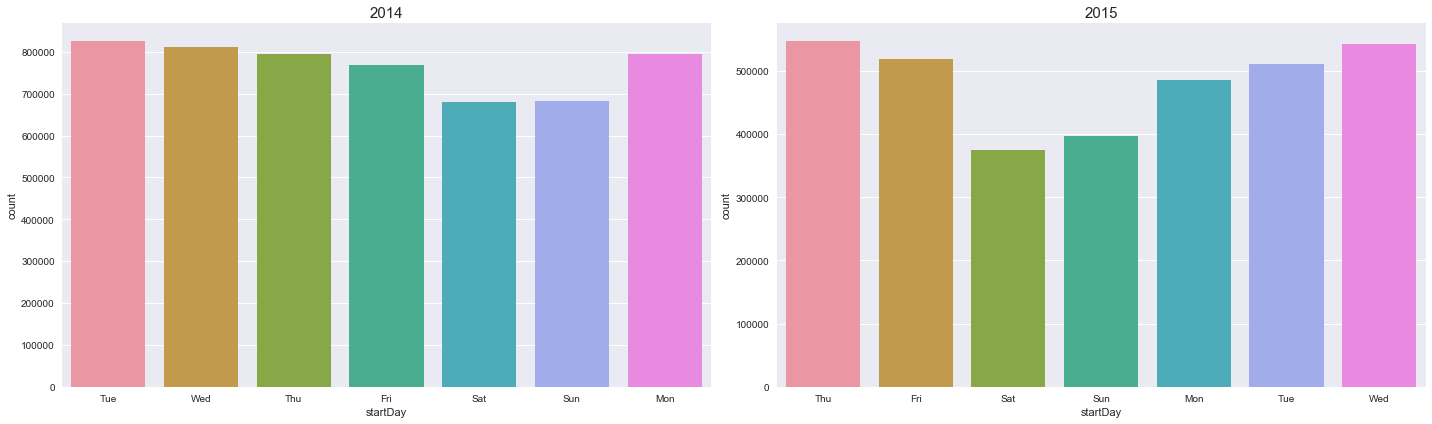

CPU times: user 8.16 s, sys: 282 ms, total: 8.44 s
Wall time: 8.55 s


In [14]:
%%time
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='startDay', data=citiBike_2014)
plt.title('2014', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(x='startDay', data=citiBike_2015)
plt.title('2015', fontsize=15)
plt.tight_layout()
plt.show()

From the above plot we can conclude that the demand for CitiBikes are usually higher on weekdays as compared to weekends, which are facing a dip in demand across both 2014 and 2015.Also, we are seeing a lesser number of total rides in 2015 as compared to 2014. This can probably be attributed to the winter months present in the data for 2015. But, we will explore the effect of months on rides later.  

### COMPARISON OF MONTH VS DAY OF WEEK

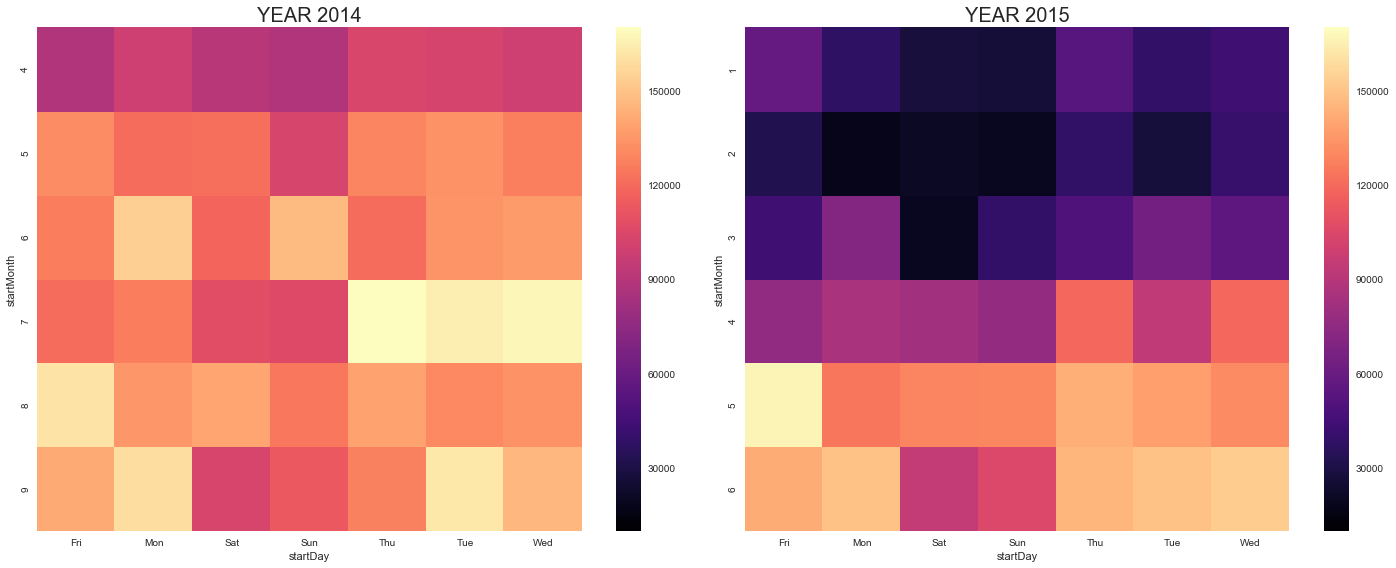

CPU times: user 4.14 s, sys: 3.81 s, total: 7.95 s
Wall time: 8.96 s


In [15]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startMonth','startDay']).count()['starttime'].unstack(), cmap='magma', label='2014', vmax=170000, vmin=10000)
plt.title('YEAR 2014', size=20)
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startMonth','startDay']).count()['starttime'].unstack(), cmap='magma', label='2015', vmax=170000, vmin=10000)
plt.tight_layout()
plt.title('YEAR 2015', size=20 )
plt.show()

The above heatmap is representing the trend of rides on CitiBike for given Month and Day of the week for 2014 & then 2015. 
<br>
The first we can notice is that there is decreaed ridership during the winter months of January, February, March which makes sense owing to the snowy conditions and low temperature in New York City during these months. Also, we see that the peaks of ridership are occuring in the summer months like May, June. 

From these indications we can assume that the weather is having a significant impact on the ridership. This also makes sense as the weather and temperature would have a greater impact on CitiBike as compared to Uber and NYC Taxi. In order to see the extent of the effect of weather, i'd like to import weather data and work with that.

### COMPARISON OF MONTH VS HOUR OF DAY

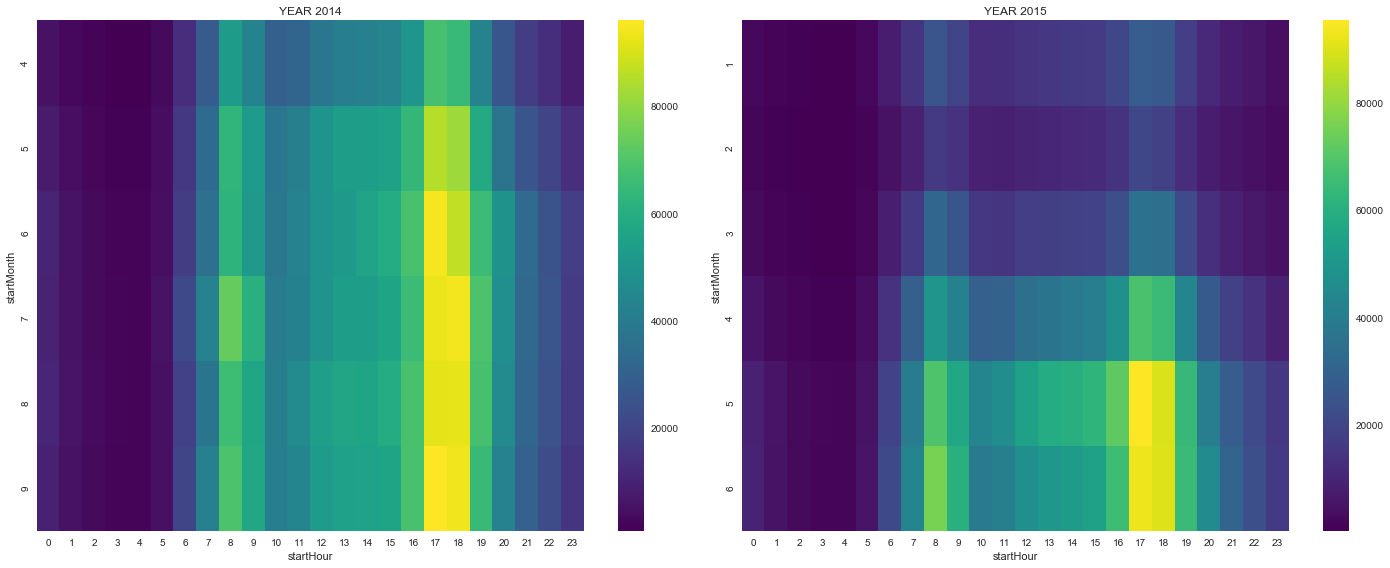

CPU times: user 3.56 s, sys: 892 ms, total: 4.45 s
Wall time: 4.62 s


In [16]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startMonth','startHour']).count()['starttime'].unstack(), cmap='viridis', label='2014')
plt.title('YEAR 2014')
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startMonth','startHour']).count()['starttime'].unstack(), cmap='viridis', label='2015')
plt.tight_layout()
plt.title('YEAR 2015')
plt.show()


### TOTAL RIDES BY SUBSCRIBED VS ONE TIME USE CUSTOMERS FOR 2014 & 2015

CPU times: user 8.2 s, sys: 222 ms, total: 8.42 s
Wall time: 8.42 s


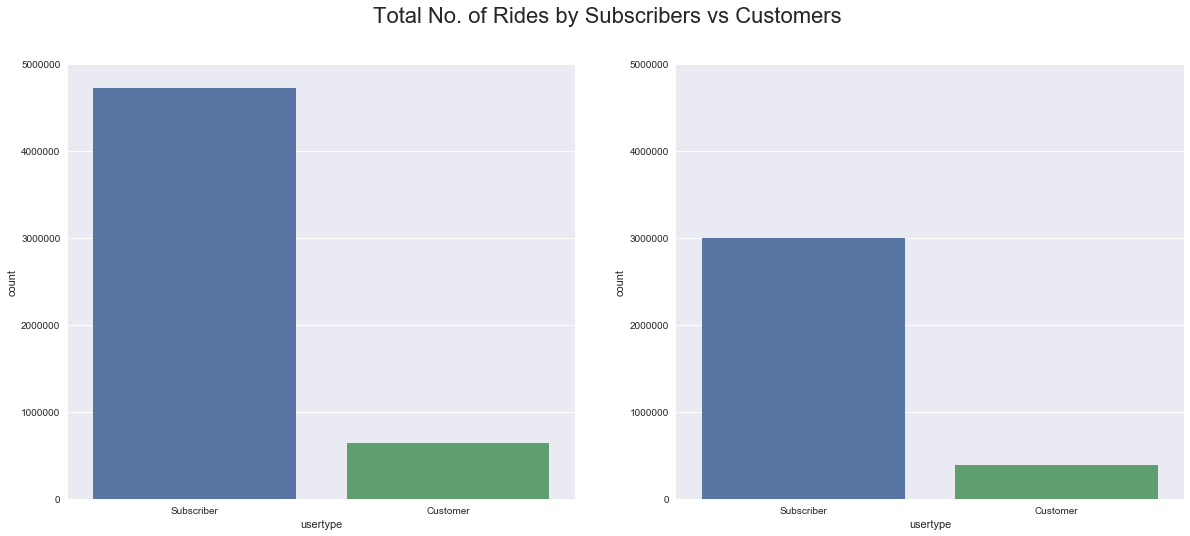

In [17]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
b = sns.countplot(x='usertype', data=citiBike_2014)
b.axes.set_ylim(0,5000000)
plt.subplot(1, 2, 2)
c = sns.countplot(x='usertype', data=citiBike_2015)
c.axes.set_ylim(0,5000000)
plt.suptitle('Total No. of Rides by Subscribers vs Customers', fontsize=22)

### Effect of Holidays on Type of Customer

Exploring the effect of holidays on the type of person taking a CitiBike, typically what I would think would be that on these days we should have a greater percentage of First Time/ One Time users as compared to an average day. 

There were <b>three federal holidays</b> in the time period we saw:
<ol>
<li>Memorial Day
<li>Independence Day
<li>Labor Day
</ol>
These three were taken into account.

Below, we explore this using two plots, the first is a countplot outlining the total number of trips on all the holidays with the total trips in 2014. The next is a pie plot showing the same figures for an average day in such a period and not the entire time period. 

CPU times: user 5.18 s, sys: 181 ms, total: 5.36 s
Wall time: 5.38 s


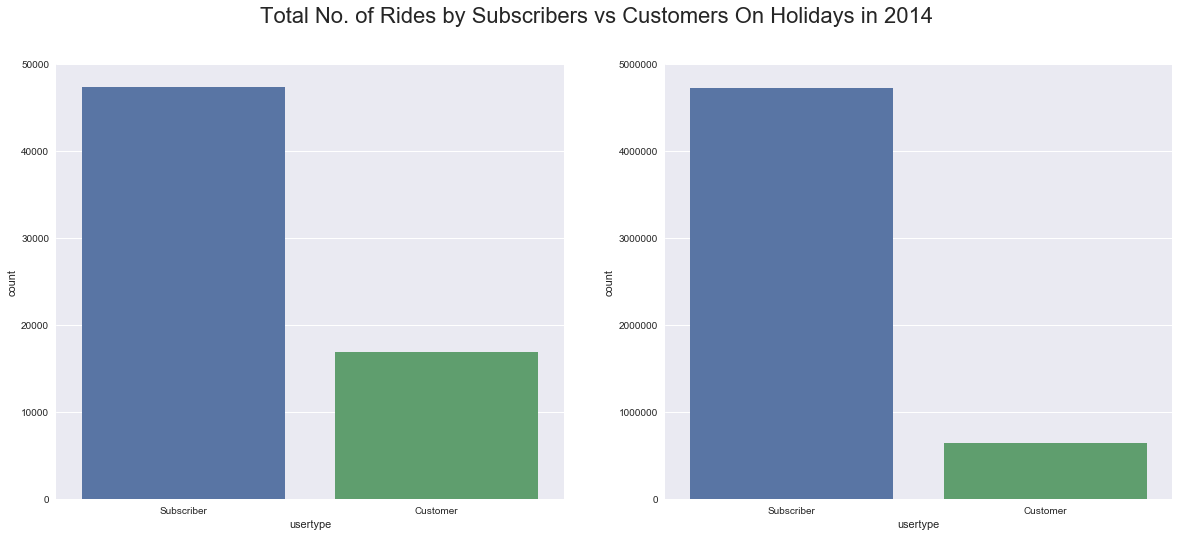

In [18]:
%%time
memorial_day = citiBike_2014[(citiBike_2014['startDateDay']==26)&(citiBike_2014['startMonth']==5)]
independence_day = citiBike_2014[(citiBike_2014['startDateDay']==4)&(citiBike_2014['startMonth']==7)]
labor_day = citiBike_2014[(citiBike_2014['startDateDay']==1)&(citiBike_2014['startMonth']==9)]
holidays_2014 = pd.concat([memorial_day,independence_day,labor_day])

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
b = sns.countplot(x='usertype', data=holidays_2014)
b.axes.set_ylim(0,50000)
plt.subplot(1, 2, 2)
c = sns.countplot(x='usertype', data=citiBike_2014)
c.axes.set_ylim(0,5000000)
plt.suptitle('Total No. of Rides by Subscribers vs Customers On Holidays in 2014', fontsize=22 )


CPU times: user 1.95 s, sys: 479 ms, total: 2.43 s
Wall time: 2.45 s


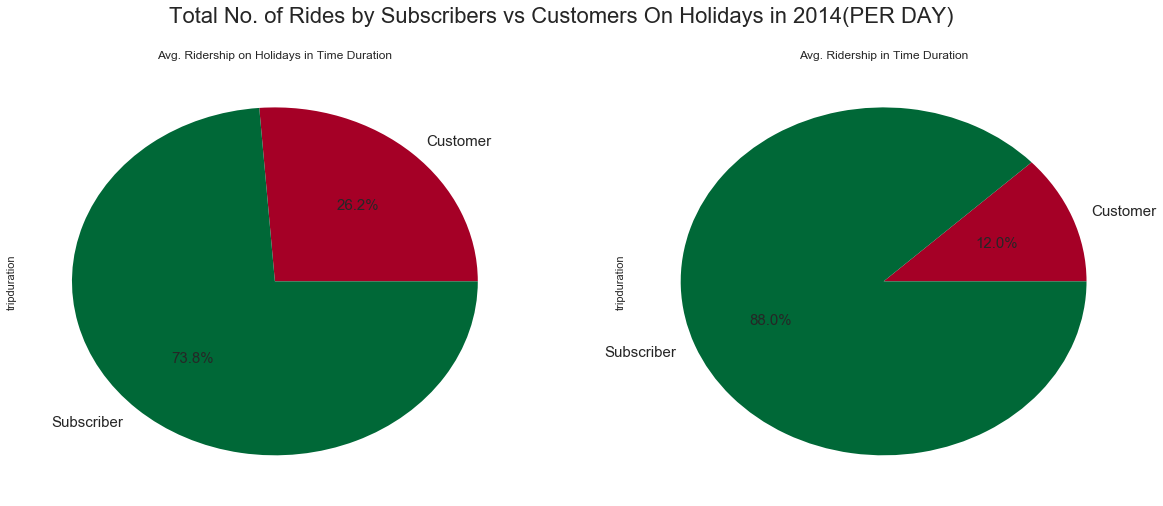

In [19]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
holidays_2014.groupby('usertype').count().apply(lambda x: x/3)['tripduration'].plot.pie(colormap='RdYlGn', autopct='%1.1f%%', fontsize=15)
plt.title('Avg. Ridership on Holidays in Time Duration')
plt.subplot(1, 2, 2)
citiBike_2014.groupby('usertype').count().apply(lambda x: x/183)['tripduration'].plot.pie(colormap='RdYlGn', autopct='%1.1f%%', fontsize=15)
plt.title('Avg. Ridership in Time Duration', )
plt.suptitle('Total No. of Rides by Subscribers vs Customers On Holidays in 2014(PER DAY)', fontsize=22)



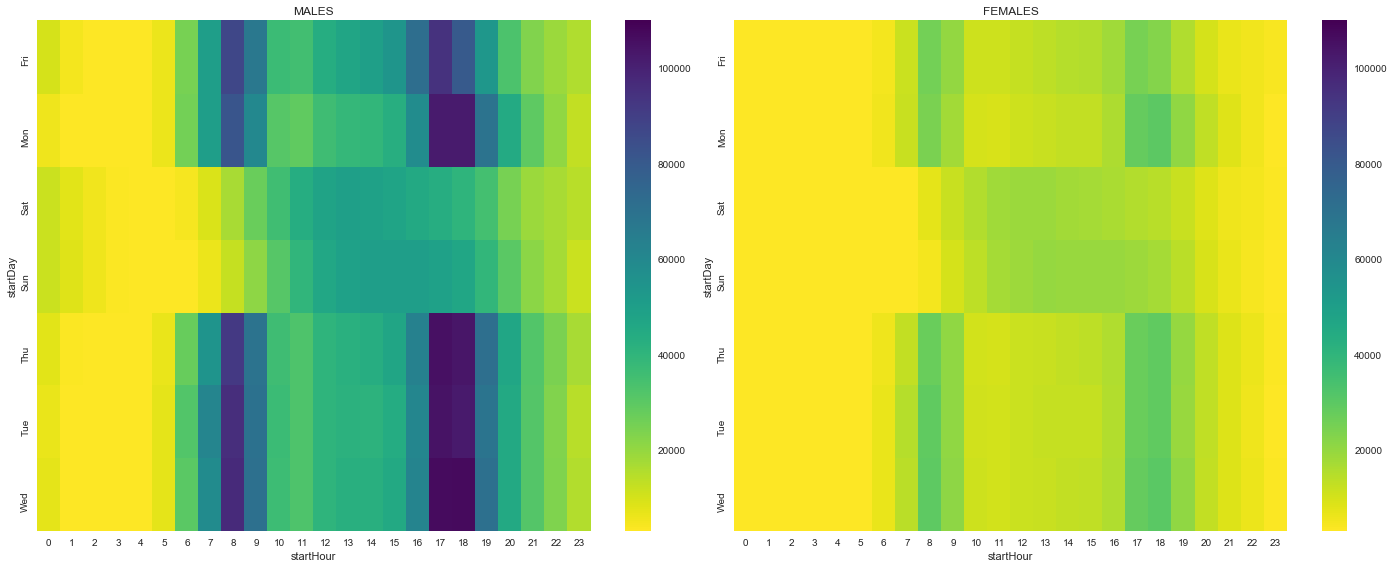

CPU times: user 7.83 s, sys: 8.09 s, total: 15.9 s
Wall time: 19.6 s


In [20]:
%%time
male_2014 = citiBike_2014[citiBike_2014['gender']==1]
female_2014 = citiBike_2014[citiBike_2014['gender']==2]
male_2015 = citiBike_2015[citiBike_2015['gender']==1]
female_2015 = citiBike_2015[citiBike_2015['gender']==2]
male = pd.concat([male_2014,male_2015])
female = pd.concat([female_2014,female_2015])

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(male.groupby(['startDay','startHour']).count()['starttime'].unstack(), cmap='viridis_r', label='Males', vmax=110000, vmin=3000)
plt.title('MALES')
plt.subplot(1, 2, 2)
sns.heatmap(female.groupby(['startDay','startHour']).count()['starttime'].unstack(), cmap='viridis_r', label='Females', vmax=110000, vmin=3000)
plt.tight_layout()
plt.title('FEMALES')
plt.tight_layout()
plt.show()

 

### AVG. TRIP DURATION VS. TIME OF DAY & DAY OF WEEK

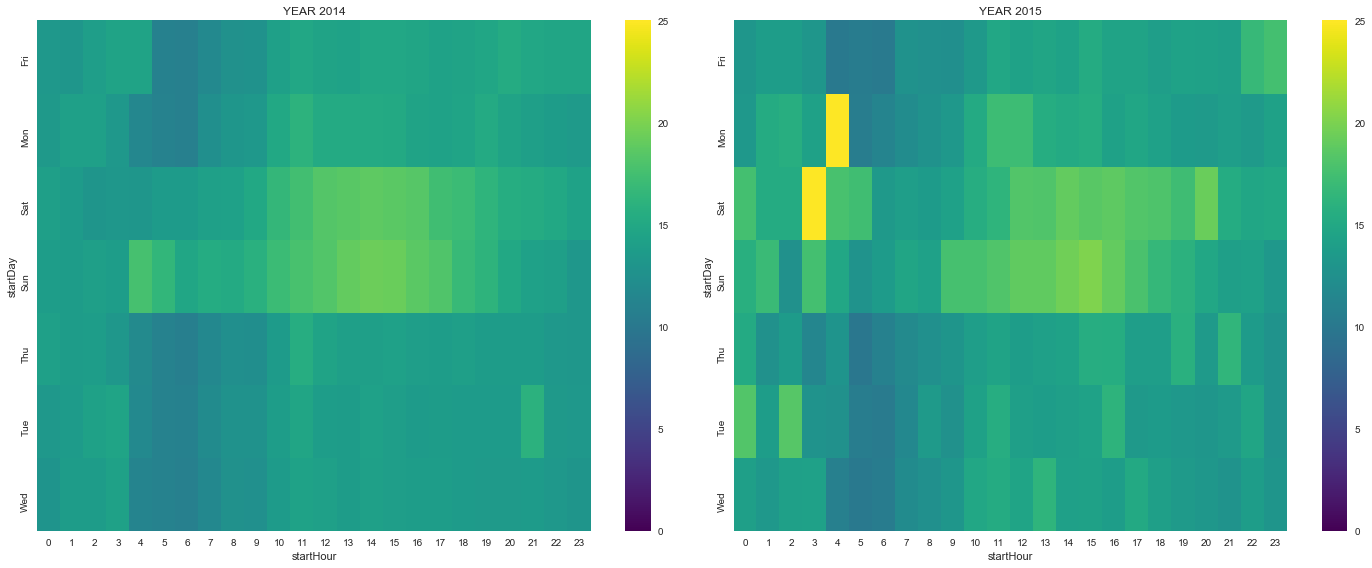

CPU times: user 2.52 s, sys: 3.7 s, total: 6.22 s
Wall time: 7.6 s


In [21]:
%%time
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startDay','startHour']).mean()['tripduration'].apply(lambda x: x/60).unstack(), cmap='viridis', label='2014', vmin=0, vmax=25)
plt.title('YEAR 2014')
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startDay','startHour']).mean()['tripduration'].apply(lambda x: x/60).unstack(), cmap='viridis', label='2015', vmin=0, vmax=25)
plt.tight_layout()
plt.title('YEAR 2015')
plt.show()

Trying to observe whether there is any trend within the time of day the trip was started, the day and the trip duration. However, I was unable to see any significant trend within the heatmap above. At most we can see that on <b>Saturday's</b> and <b>Sunday's</b> around <b>12 P.M.</b> till <b>5 P.M.</b> there is a marginal increase in the duration of the trip. This could be attributed to more traffic over the weekends in NYC.  

### EFFECT OF MAX AND MIN TEMPERATURE ON THE TRIPS 

Next, we'll study the effect of the maximum and minimum temperature on the trips being taken. The data has been requested from the NOAA (National Oceanic and Atmospheric Administration).
The Data has been obtained for the New York City area for the months of 2014 for which we have the data for CitiBike rides in the variable citiBike_2014. 

In [22]:
%%time
weather_data = pd.read_csv('929752.csv')

CPU times: user 31.3 ms, sys: 12.7 ms, total: 44 ms
Wall time: 54 ms


In [23]:
%%time
weather_data.drop(['STATION','TAVG','WT01','WT02','WT03','WT04','WT05','WT06','WT08','WT09','WT10','WT11'], axis=1, inplace=True)

CPU times: user 1.7 ms, sys: 231 µs, total: 1.93 ms
Wall time: 2.12 ms


In [24]:
%%time
weather_data_NYC = weather_data.copy()
weather_data_NYC.head()

CPU times: user 1.26 ms, sys: 875 µs, total: 2.13 ms
Wall time: 1.52 ms


In [25]:
%%time
weather_data_NYC['DATE'] = weather_data_NYC['DATE'].apply(lambda x: str(x))

weather_data_NYC['YEAR'] = weather_data_NYC['DATE'].apply(lambda x: x[:4])
weather_data_NYC['MONTH'] = weather_data_NYC['DATE'].apply(lambda x: x[4:6])
weather_data_NYC['DAY'] = weather_data_NYC['DATE'].apply(lambda x: x[7:])
weather_data_NYC['TAVG'] = weather_data_NYC[['TMAX', 'TMIN']].mean(axis=1)

CPU times: user 24.6 ms, sys: 5.66 ms, total: 30.2 ms
Wall time: 27.7 ms


In [26]:
%%time
NYC_citi = weather_data_NYC[weather_data_NYC['STATION_NAME']=='NY CITY CENTRAL PARK NY US']
NYC_citi.reset_index(inplace=True)
NYC_citi.head()

CPU times: user 5.24 ms, sys: 5.32 ms, total: 10.6 ms
Wall time: 9.57 ms


In [43]:
NYC_citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
index           183 non-null int64
STATION_NAME    183 non-null object
DATE            183 non-null object
PRCP            183 non-null float64
SNOW            183 non-null float64
TMAX            183 non-null int64
TMIN            183 non-null int64
YEAR            183 non-null object
MONTH           183 non-null object
DAY             183 non-null object
TAVG            183 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 15.8+ KB


In [44]:
%%time
temp_rides = pd.merge(citiBike_2014, NYC_citi, left_on='YYYYMMDD', right_on='DATE', how='inner')

CPU times: user 4.08 s, sys: 4.17 s, total: 8.25 s
Wall time: 9.46 s


In [32]:
temp_rides.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,STATION_NAME,DATE,PRCP,SNOW,TMAX,TMIN,YEAR,MONTH,DAY,TAVG
0,558,2014-04-01 00:00:07,2014-04-01 00:09:25,82,St James Pl & Pearl St,40.711174,-74.000165,2008,Little West St & 1 Pl,40.705693,...,NY CITY CENTRAL PARK NY US,20140401,0.0,0.0,60,39,2014,04,1,49.5
1,882,2014-04-01 00:00:20,2014-04-01 00:15:02,349,Rivington St & Ridge St,40.718502,-73.983299,312,Allen St & E Houston St,40.722055,...,NY CITY CENTRAL PARK NY US,20140401,0.0,0.0,60,39,2014,04,1,49.5


In [ ]:
temp_rides['PRCP'] = temp_rides['PRCP'].apply(lambda x: int(x))

CPU times: user 4.15 s, sys: 556 ms, total: 4.7 s
Wall time: 4.74 s


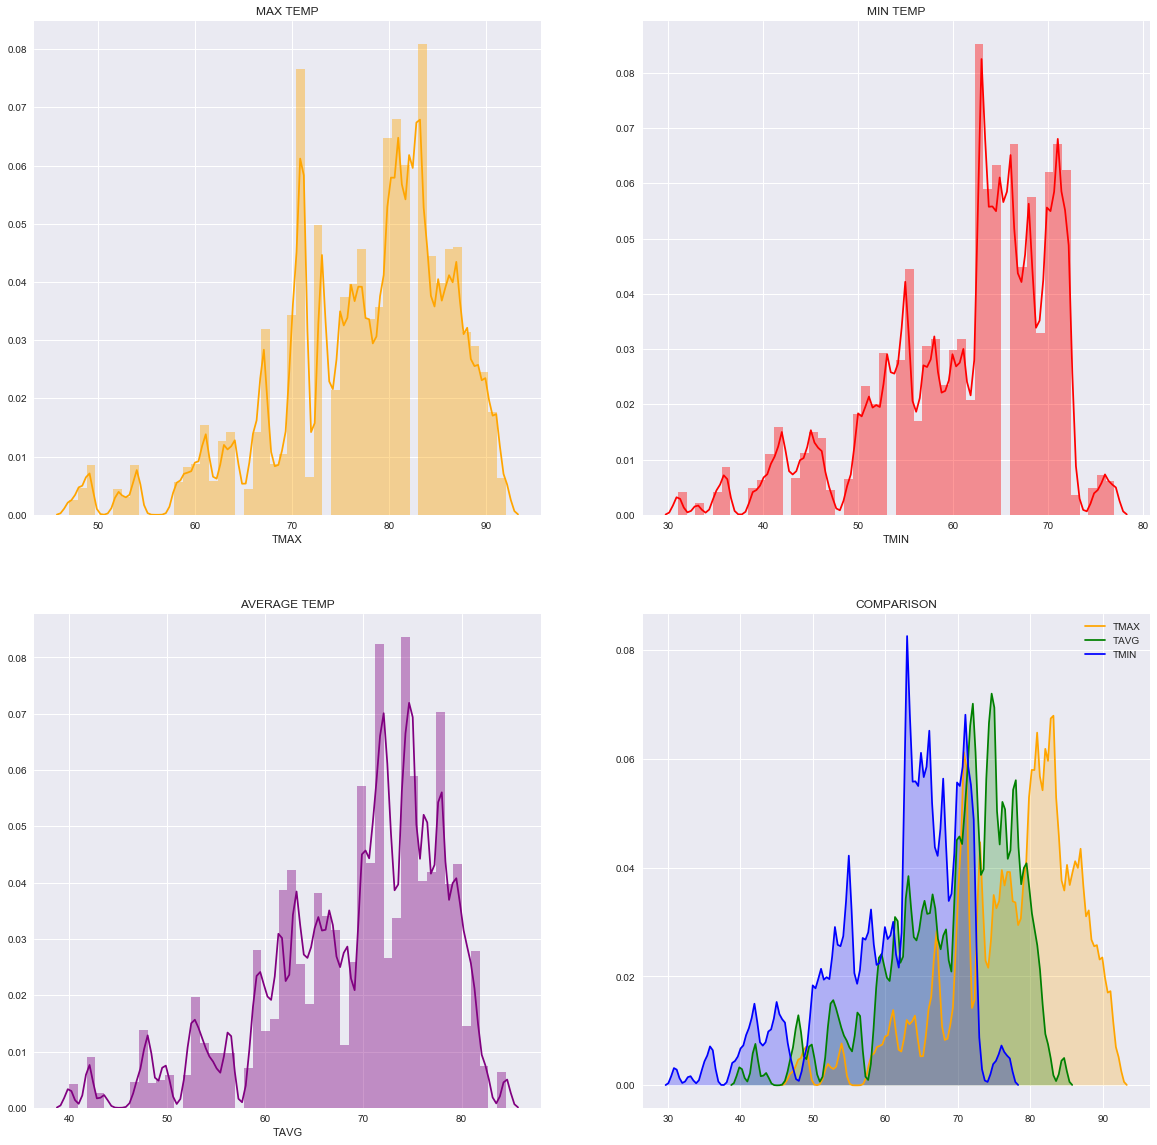

In [47]:
%%time
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.distplot(temp_rides['TMAX'], color='orange')
plt.title('MAX TEMP')
plt.subplot(2,2,2)
sns.distplot(temp_rides['TMIN'], color='red')
plt.title('MIN TEMP')
plt.subplot(2,2,3)
sns.distplot(temp_rides['TAVG'], color='purple')
plt.title('AVERAGE TEMP')
plt.subplot(2,2,4)
sns.kdeplot(temp_rides['TMAX'], color='orange', shade=True)
sns.kdeplot(temp_rides['TAVG'], color='green', shade=True)
sns.kdeplot(temp_rides['TMIN'], color='blue', shade=True)
plt.title('COMPARISON')


The above 4 plots shows us the counts of trips made when there is a certain maximum, minimum and average temperature. The 1st Plot is showing us the the rides with the Maximum Temperature. We see a rise in rides when the temperature is around 70 and and then we have another rise when the temperature is around 80-85. 

Upon seeing the minimum temperature, of the day we see that there is an increase in the nuber of rides, where the min. temp is around 62-70 degrees. This would typically indicate a pleasent/mildly hot day. 

I also tried to observe a measure of TAVG or Average Temperature. This was basically to measure what the entire day was like. This is being taken as an avereage measure to see whether it was a cold, hot or pleasent day in general. 

This data is however a bit skewed as I have not factored in all the months for the year. It basically accounts for 6 months, from April to September when the temperatue is realtively pleasent, and there is no likely snowfall. Later on I will also try to factor in all the months and then factor in temperature, precipitation and snowfall as influencing factors. 

Below, I try to explore the likelihood of a citiBike being taken given the Minimum & Maximum Temperature for any day. This is being done using a density plot. with a KDE plot at the margins. These KDE plots are actually the same as those presented in the previous figures. 


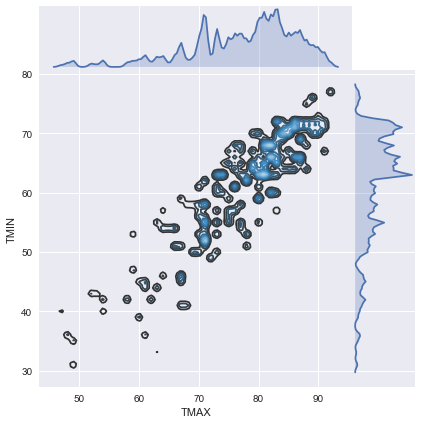

In [50]:
%%time
g = sns.JointGrid(x="TMAX", y="TMIN", data=temp_rides, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
Fro tg = g.plot_marginals(sns.kdeplot, shade=True)

From the density plot in the main figure above, we note that there is much more liklihood of a citiBike being used when there is a temperature within the range of MAX - 75-90 and MIN - 55-75. This makes a lot of sense as these temperture ranges would typically indicate that it is a pleasent day. 

It is interesting to note that I did encounter something that while trying to plot a KDE plot, it took a extremely long time in order to create the result. This time was taken on a dataset of around 5 million rows. But, if I plan to explore the effect of temperature, precipitation and snow on the rides. For that there are two main hurdles. The first is setting up an AWS EC2 conainter which will provide much more computing power and storage. the second hurdle is to obtain the weather data from the NOAA for new york for the new duation of 2014-2016. 